In [1]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import svm

In [2]:
# Train and Test data for 10000 rows

In [3]:
# load the first 10000 data from each dataset.
df_train_10000 = pd.read_csv("train.csv", nrows=10000) # header, column_names, nrows are some of the parameters while reading the file
df_test_10000 = pd.read_csv("test.csv", nrows=10002) # header, column_names, nrows are some of the parameters while reading the file

In [4]:
# Note: In Test Data, we are taking 10002 data as it contains 2 null values which will be verified later

In [5]:
# prints the first 5 rows of train data
df_train_10000.head()

,label,title,content
0,1,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...
1,1,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
2,1,Amazing!,This soundtrack is my favorite music of all ti...
3,1,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
4,1,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."


In [6]:
# prints the first 5 rows of test data
df_test_10000.head()

,label,title,content
0,1,Great CD,My lovely Pat has one of the GREAT voices of h...
1,1,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...
2,0,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...
3,1,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...
4,1,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...


In [7]:
# EDA - Exploratory Data Analysis

In [8]:
# prints the count of each column in the train data
df_train_10000.count()

label      10000
title      10000
content    10000
dtype: int64

In [9]:
# prints the count of each column in the test data
df_test_10000.count()

label      10002
title      10000
content    10002
dtype: int64

In [10]:
# check the number of values in the taget variable
# this is done to ensure that ouput data will not be biased to a class
df_train_10000['label'].value_counts()

label
0    5097
1    4903
Name: count, dtype: int64

In [11]:
# check the number of values in the taget variable
# this is done to ensure that ouput data will not be biased to a class
df_test_10000['label'].value_counts()

label
1    5126
0    4876
Name: count, dtype: int64

In [12]:
# since the values are somewhat nearer and hence it is a balanced data

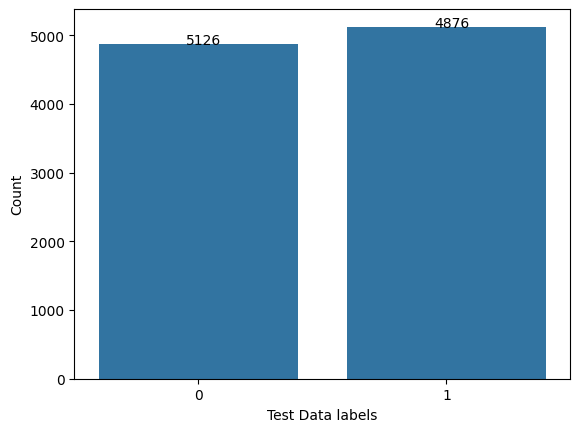

In [13]:
# plotting the countplot of label (target) in test data
ax = sns.countplot(x='label',data=df_test_10000)

# setting the xlabel and ylabel of the graph
ax.set(xlabel='Test Data labels', ylabel='Count')

# Adding labels to the graph indicating the count (in number)
for p, label in zip(ax.patches, df_test_10000["label"].value_counts()):
    ax.annotate(label, (p.get_x()+0.350, p.get_height()+1))

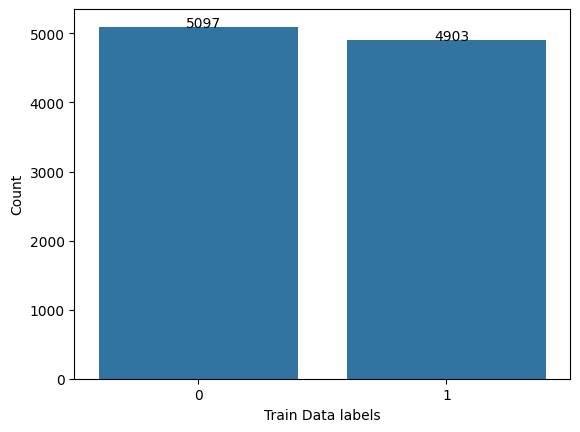

In [14]:
# plotting the countplot of label (target) in test data
ax=sns.countplot(x='label',data=df_train_10000)

# setting the xlabel and ylabel of the graph
ax.set(xlabel='Train Data labels', ylabel='Count')

# Adding labels to the graph indicating the count (in number)
for p, label in zip(ax.patches, df_train_10000["label"].value_counts()):
    ax.annotate(label, (p.get_x()+0.350, p.get_height()+1))

In [15]:
# description of the train data
df_train_10000.describe(include = 'all')

,label,title,content
count,10000.000000,10000,10000
unique,NaN,9320,9998
top,NaN,Disappointed,"A well-crafted, sharp-witted tale that will be..."
freq,NaN,27,2
mean,0.490300,NaN,NaN
std,0.499931,NaN,NaN
min,0.000000,NaN,NaN
25%,0.000000,NaN,NaN
50%,0.000000,NaN,NaN
75%,1.000000,NaN,NaN


In [16]:
# description of the test data
df_test_10000.describe(include = 'all')

,label,title,content
count,10002.000000,10000,10002
unique,NaN,9443,9999
top,NaN,Disappointing,Rather pretentious comedy featuring Mel Gibson...
freq,NaN,29,2
mean,0.512498,NaN,NaN
std,0.499869,NaN,NaN
min,0.000000,NaN,NaN
25%,0.000000,NaN,NaN
50%,1.000000,NaN,NaN
75%,1.000000,NaN,NaN


In [17]:
# Check for Null Values in the train data
df_train_10000.isnull().sum()

label      0
title      0
content    0
dtype: int64

In [18]:
# Check for Null Values in the test data
df_test_10000.isnull().sum()

label      0
title      2
content    0
dtype: int64

In [19]:
# There are no null values in the train data, however there are 2 null values in the test data

In [20]:
# Drop the null value data from the train data
df_test_10000.dropna(inplace=True)

In [21]:
# Check for Null Values in the train data
df_test_10000.isnull().sum()

label      0
title      0
content    0
dtype: int64

In [22]:
# prints the names of all the columns in the train data
df_train_10000.columns

Index(['label', 'title', 'content'], dtype='object')

In [23]:
# prints the names of all the columns in the test data
df_test_10000.columns

Index(['label', 'title', 'content'], dtype='object')

In [24]:
# create a new column named 'data_type' in the train data with value as "train"
df_train_10000['data_type'] = 'train'

# create a new column named 'data_type' in the test data with value as "test"
df_test_10000['data_type'] = 'test'

In [25]:
# prints the train data
df_train_10000

,label,title,content,data_type
0,1,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...,train
1,1,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...,train
2,1,Amazing!,This soundtrack is my favorite music of all ti...,train
3,1,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...,train
4,1,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine...",train
...,...,...,...,...
9995,1,A revelation of life in small town America in ...,"Though a scholarly biography, the book reveals...",train
9996,1,Great biography of a very interesting journalist,"This biography of Arthur Aull, a small-town jo...",train
9997,0,Interesting Subject; Poor Presentation,You'd be hard-pressed to tell a boring story a...,train
9998,0,Don't buy,The box looked used and it is obviously not ne...,train


In [26]:
# prints the test data
df_test_10000

,label,title,content,data_type
0,1,Great CD,My lovely Pat has one of the GREAT voices of h...,test
1,1,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...,test
2,0,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...,test
3,1,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...,test
4,1,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...,test
...,...,...,...,...
9997,1,Love it Love it Love it,"My daughter loves this, she is six months old ...",test
9998,0,Faulty leg causing distress for my baby,I purchased this item for my 6 month old baby ...,test
9999,1,Fantastic Entertainer,My daughter started enjoying this around 4-1/2...,test
10000,0,You can do better,I am a first time mom and loved the baby einst...,test


In [27]:
# Concatenate the 2 data(test and train) along the rows (axis=0)
df = pd.concat([df_train_10000, df_test_10000], axis=0)
df


,label,title,content,data_type
0,1,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...,train
1,1,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...,train
2,1,Amazing!,This soundtrack is my favorite music of all ti...,train
3,1,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...,train
4,1,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine...",train
...,...,...,...,...
9997,1,Love it Love it Love it,"My daughter loves this, she is six months old ...",test
9998,0,Faulty leg causing distress for my baby,I purchased this item for my 6 month old baby ...,test
9999,1,Fantastic Entertainer,My daughter started enjoying this around 4-1/2...,test
10000,0,You can do better,I am a first time mom and loved the baby einst...,test


## CountVectorization

In [28]:
vectorizer = CountVectorizer()
# This line creates an instance of the CountVectorizer class. 
# The CountVectorizer is used to convert a collection of text documents to a matrix of token counts. 
# It essentially transforms a set of text data into a format that can be used as input to a machine learning model.

x = vectorizer.fit_transform(df['title'])
# This method is used to both fit the vectorizer to the data (determine the vocabulary) 
# and transform the input data into a numerical format.
# In this case, we are fitting the vectorizer and transforming the 'title' column of the DataFrame.
# The result of the fit_transform operation is stored in the variable x

In [29]:
# prints the x
x

<20000x11092 sparse matrix of type '<class 'numpy.int64'>'
	with 81497 stored elements in Compressed Sparse Row format>

In [30]:
# converts the x into array format
x.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [31]:
# This method returns an array of feature names, which are the terms or words used in the vectorized representation of your data.
# It can be useful to inspect the features generated by the vectorizer, 
# especially if you want to understand which words or terms correspond to specific columns in your feature matrix.
# finally stores the value to y
y = vectorizer.get_feature_names_out()
y

array(['00', '000', '02', ..., 'zzzzzzzzzzzzzzzzzzzzz',
       'zzzzzzzzzzzzzzzzzzzzzzzzz', 'él'], dtype=object)

In [32]:
# stores the value of x and y into a dataframe
data = pd.DataFrame(x.toarray(),columns=y)
data


,00,000,02,03,05,06,07,09,0zero0,10,...,zzzzzz,zzzzzzz,zzzzzzzzzz,zzzzzzzzzzz,zzzzzzzzzzzzz,zzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzzzzzz,él
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
# Resetting the index of both DataFrames
data = data.reset_index(drop=True)
df = df.reset_index(drop=True)

# Add a column named label_x to the data DataFrame with values from df label
data['label_x'] = df['label']


In [34]:
# printing data
data

,00,000,02,03,05,06,07,09,0zero0,10,...,zzzzzzz,zzzzzzzzzz,zzzzzzzzzzz,zzzzzzzzzzzzz,zzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzzzzzz,él,label_x
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
19996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
19998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
# Check for null values in data
data.isnull().sum()

00                           0
000                          0
02                           0
03                           0
05                           0
                            ..
zzzzzzzzzzzzzzzzzz           0
zzzzzzzzzzzzzzzzzzzzz        0
zzzzzzzzzzzzzzzzzzzzzzzzz    0
él                           0
label_x                      0
Length: 11093, dtype: int64

In [36]:
# create a column named 'data_type_x' in data with values from df 'data_type_x'
data['data_type_x'] =  df['data_type']

In [37]:
# print data
data

,00,000,02,03,05,06,07,09,0zero0,10,...,zzzzzzzzzz,zzzzzzzzzzz,zzzzzzzzzzzzz,zzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzzzzzz,él,label_x,data_type_x
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,train
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,train
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,train
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,train
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,test
19996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,test
19997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,test
19998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,test


In [38]:
# assign data from the dataframe 'data' whose 'data_type_x' column values is 'train'
train = data[data['data_type_x']=='train']

In [39]:
# print train
train

,00,000,02,03,05,06,07,09,0zero0,10,...,zzzzzzzzzz,zzzzzzzzzzz,zzzzzzzzzzzzz,zzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzzzzzz,él,label_x,data_type_x
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,train
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,train
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,train
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,train
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,train
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,train
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,train
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,train


In [40]:
# assign data from the dataframe 'data' whose 'data_type_x' column values is 'test'
test = data[data['data_type_x']=='test']

In [41]:
# print test
test

,00,000,02,03,05,06,07,09,0zero0,10,...,zzzzzzzzzz,zzzzzzzzzzz,zzzzzzzzzzzzz,zzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzzzzzz,él,label_x,data_type_x
10000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,test
10001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,test
10002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,test
10003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,test
10004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,test
19996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,test
19997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,test
19998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,test


In [42]:
# define X_train, X_test, y_train, y_test

X_train = train.loc[:, ~train.columns.isin(['label_x', 'data_type_x'])]
y_train = train['label_x']

X_test = test.loc[:, ~test.columns.isin(['label_x', 'data_type_x'])]
y_test = test['label_x']


In [43]:
# print the shape of X_train and X_test
print(X_train.shape)
print(X_test.shape)

(10000, 11092)
(10000, 11092)


In [44]:
# print the column names of X_train and X_test
print(X_test.columns)
print(X_train.columns)

Index(['00', '000', '02', '03', '05', '06', '07', '09', '0zero0', '10',
       ...
       'zzzzzz', 'zzzzzzz', 'zzzzzzzzzz', 'zzzzzzzzzzz', 'zzzzzzzzzzzzz',
       'zzzzzzzzzzzzzzzzz', 'zzzzzzzzzzzzzzzzzz', 'zzzzzzzzzzzzzzzzzzzzz',
       'zzzzzzzzzzzzzzzzzzzzzzzzz', 'él'],
      dtype='object', length=11092)
Index(['00', '000', '02', '03', '05', '06', '07', '09', '0zero0', '10',
       ...
       'zzzzzz', 'zzzzzzz', 'zzzzzzzzzz', 'zzzzzzzzzzz', 'zzzzzzzzzzzzz',
       'zzzzzzzzzzzzzzzzz', 'zzzzzzzzzzzzzzzzzz', 'zzzzzzzzzzzzzzzzzzzzz',
       'zzzzzzzzzzzzzzzzzzzzzzzzz', 'él'],
      dtype='object', length=11092)


In [45]:
# define logistic regression and fit it to X_train and y_train 
clf1 = LogisticRegression(random_state=7).fit(X_train,y_train)


In [46]:
# define RandomForest and fit it to X_train and y_train
clf2 = RandomForestClassifier(random_state=7,max_depth=10).fit(X_train,y_train)


In [47]:
# define SVM and fit it to X_train and y_train
clf3 = svm.SVC(random_state=7,C=.1).fit(X_train,y_train)

In [48]:
# make predictions for each Algorithms
y_pred_1 = clf1.predict(X_test)
y_pred_2 = clf2.predict(X_test)
y_pred_3 = clf3.predict(X_test)

In [49]:
# calculate the confusion matrix for each algorithm
conf1 = confusion_matrix(y_test,y_pred_1)
conf2 = confusion_matrix(y_test,y_pred_2)
conf3 = confusion_matrix(y_test,y_pred_3)

In [50]:
# confusion matrix for logistic regression
conf1

array([[3856, 1019],
       [1145, 3980]], dtype=int64)

In [51]:
# confusion matrix for Random Forest
conf2

array([[4483,  392],
       [2614, 2511]], dtype=int64)

In [52]:
# confusion matrix for SVM
conf3

array([[4138,  737],
       [2069, 3056]], dtype=int64)

In [53]:
#Precision = TruePositives / (TruePositives + FalsePositives)

# calculate the precision for each algorithm
p1 = conf1[0][0]/(conf1[0][0]+conf1[1][0])
p2 = conf2[0][0]/(conf2[0][0]+conf2[1][0])
p3 = conf3[0][0]/(conf3[0][0]+conf3[1][0])

# print the precision values for each algorithm
print("The precision value for Logistic Regression is: {:.2f} %".format(p1 * 100))
print("The precision value for Random Forest is: {:.2f} %".format(p2 * 100))
print("The precision value for SVM is: {:.2f} %".format(p3 * 100))


The precision value for Logistic Regression is: 77.10 %
The precision value for Random Forest is: 63.17 %
The precision value for SVM is: 66.67 %


In [54]:
# Recall = TruePositives / (TruePositives + FalseNegatives)

# calculate the recall for each algorithm
r1 = conf1[0][0]/(conf1[0][0]+conf1[0][1])
r2 = conf2[0][0]/(conf2[0][0]+conf2[0][1])
r3 = conf3[0][0]/(conf3[0][0]+conf3[0][1])

# print the precision values for each algorithm
print("The recall value for Logistic Regression is: {:.2f} %".format(r1 * 100))
print("The recall value for Random Forest is: {:.2f} %".format(r2 * 100))
print("The recall value for SVM is: {:.2f} %".format(r3 * 100))


The recall value for Logistic Regression is: 79.10 %
The recall value for Random Forest is: 91.96 %
The recall value for SVM is: 84.88 %


## Tf-Idf Vectorizer

In [55]:
# create an instance of the TfidfVectorizer class. 
vectorizer = TfidfVectorizer()

x_vect = vectorizer.fit_transform(df['title'])
# This method is used to both fit the vectorizer to the data (determine the vocabulary) 
# and transform the input data into a numerical format.
# In this case, we are fitting the vectorizer and transforming the 'title' column of the DataFrame.
# The result of the fit_transform operation is stored in the variable x

# convert the x-vect into array format
x_vect = x_vect.toarray()

y_vect = vectorizer.get_feature_names_out()
# This method returns an array of feature names, which are the terms or words used in the vectorized representation of your data.
# It can be useful to inspect the features generated by the vectorizer, 
# especially if you want to understand which words or terms correspond to specific columns in your feature matrix.
# finally stores the value to y


In [56]:
# prints the x_vect
x_vect

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [57]:
# prints the y_vect
y_vect

array(['00', '000', '02', ..., 'zzzzzzzzzzzzzzzzzzzzz',
       'zzzzzzzzzzzzzzzzzzzzzzzzz', 'él'], dtype=object)

In [58]:
# stores the value of x_vect and y_vect into a dataframe
data_vect = pd.DataFrame(x_vect,columns=y_vect)
data_vect

,00,000,02,03,05,06,07,09,0zero0,10,...,zzzzzz,zzzzzzz,zzzzzzzzzz,zzzzzzzzzzz,zzzzzzzzzzzzz,zzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzzzzzz,él
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
# Add a column named label_x to the data_vect dataframe with values from df label 
data_vect['label_x'] = df['label']
data_vect


,00,000,02,03,05,06,07,09,0zero0,10,...,zzzzzzz,zzzzzzzzzz,zzzzzzzzzzz,zzzzzzzzzzzzz,zzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzzzzzz,él,label_x
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
19996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
19997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
19998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [60]:
# checking for null values in data_vect dataframe
data_vect.isnull().sum()

00                           0
000                          0
02                           0
03                           0
05                           0
                            ..
zzzzzzzzzzzzzzzzzz           0
zzzzzzzzzzzzzzzzzzzzz        0
zzzzzzzzzzzzzzzzzzzzzzzzz    0
él                           0
label_x                      0
Length: 11093, dtype: int64

In [61]:
# Add a column named data_type_x to the data_vect dataframe with values from df data_type
data_vect['data_type_x'] =  df['data_type']
data_vect


,00,000,02,03,05,06,07,09,0zero0,10,...,zzzzzzzzzz,zzzzzzzzzzz,zzzzzzzzzzzzz,zzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzzzzzz,él,label_x,data_type_x
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,train
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,train
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,train
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,train
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,test
19996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,test
19997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,test
19998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,test


In [62]:
# assign data from the dataframe 'data_vect' whose 'data_type_x' column values is 'train'
train_vect = data_vect[data_vect['data_type_x']=='train']
train_vect


,00,000,02,03,05,06,07,09,0zero0,10,...,zzzzzzzzzz,zzzzzzzzzzz,zzzzzzzzzzzzz,zzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzzzzzz,él,label_x,data_type_x
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,train
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,train
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,train
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,train
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,train
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,train
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,train
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,train


In [63]:
# assign data from the dataframe 'data_vect' whose 'data_type_x' column values is 'test'
test_vect = data_vect[data_vect['data_type_x']=='test']
test_vect


,00,000,02,03,05,06,07,09,0zero0,10,...,zzzzzzzzzz,zzzzzzzzzzz,zzzzzzzzzzzzz,zzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzzzzzz,él,label_x,data_type_x
10000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,test
10001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,test
10002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,test
10003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,test
10004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,test
19996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,test
19997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,test
19998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,test


In [64]:
# Define X_train_vect, y_train_vect, X_test_vect, y_test_vect

X_train_vect = train_vect.loc[:, ~train_vect.columns.isin(['label_x', 'data_type_x'])]
y_train_vect = train_vect['label_x']

X_test_vect = test_vect.loc[:, ~test_vect.columns.isin(['label_x', 'data_type_x'])]
y_test_vect = test_vect['label_x']


In [65]:
# print the shape of X_train_vect and X_test_vect
print(X_train_vect.shape)
print(X_test_vect.shape)



(10000, 11092)
(10000, 11092)


In [66]:
# print the column names of X_train_vect and X_test_vect
print(X_test_vect.columns)
print(X_train_vect.columns)



Index(['00', '000', '02', '03', '05', '06', '07', '09', '0zero0', '10',
       ...
       'zzzzzz', 'zzzzzzz', 'zzzzzzzzzz', 'zzzzzzzzzzz', 'zzzzzzzzzzzzz',
       'zzzzzzzzzzzzzzzzz', 'zzzzzzzzzzzzzzzzzz', 'zzzzzzzzzzzzzzzzzzzzz',
       'zzzzzzzzzzzzzzzzzzzzzzzzz', 'él'],
      dtype='object', length=11092)
Index(['00', '000', '02', '03', '05', '06', '07', '09', '0zero0', '10',
       ...
       'zzzzzz', 'zzzzzzz', 'zzzzzzzzzz', 'zzzzzzzzzzz', 'zzzzzzzzzzzzz',
       'zzzzzzzzzzzzzzzzz', 'zzzzzzzzzzzzzzzzzz', 'zzzzzzzzzzzzzzzzzzzzz',
       'zzzzzzzzzzzzzzzzzzzzzzzzz', 'él'],
      dtype='object', length=11092)


In [67]:
# define logistic regression and fit it to X_train_vect and y_train_vect 
clf1_vect = LogisticRegression(random_state=7).fit(X_train_vect,y_train_vect)



In [68]:
# define Random Forest and fit it to X_train_vect and y_train_vect
clf2_vect = RandomForestClassifier(random_state=7,max_depth=10).fit(X_train_vect,y_train_vect)



In [69]:
# define SVM and fit it to X_train_vect and y_train_vect
clf3_vect = svm.SVC(random_state=7,C=.1).fit(X_train_vect,y_train_vect)


In [70]:
# Make predictions on X_test_vect for each algorithm
y_pred_1_vect = clf1_vect.predict(X_test_vect)
y_pred_2_vect = clf2_vect.predict(X_test_vect)
y_pred_3_vect = clf3_vect.predict(X_test_vect)


In [71]:
# Confusion matrix for each algorithm
conf1_vect = confusion_matrix(y_test_vect,y_pred_1_vect)
conf2_vect = confusion_matrix(y_test_vect,y_pred_2_vect)
conf3_vect = confusion_matrix(y_test_vect,y_pred_3_vect)


In [72]:
# confusion matrix for logistic regression
conf1_vect


array([[3859, 1016],
       [1168, 3957]], dtype=int64)

In [73]:
# confusion matrix for random forest
conf2_vect


array([[4512,  363],
       [2664, 2461]], dtype=int64)

In [74]:
# confusion matrix for svm
conf3_vect


array([[4347,  528],
       [2034, 3091]], dtype=int64)

In [75]:
# Precision = TruePositives / (TruePositives + FalsePositives)

# precision for each algorithm
p1_vect = conf1_vect[0][0]/(conf1_vect[0][0]+conf1_vect[1][0])
p2_vect = conf2_vect[0][0]/(conf2_vect[0][0]+conf2_vect[1][0])
p3_vect = conf3_vect[0][0]/(conf3_vect[0][0]+conf3_vect[1][0])


In [76]:
# print the precision values for each algorithm
print("The precision value for Logistic Regression is: {:.2f} %".format(p1_vect * 100))
print("The precision value for Random Forest is: {:.2f} %".format(p2_vect * 100))
print("The precision value for SVM is: {:.2f} %".format(p3_vect * 100))


The precision value for Logistic Regression is: 76.77 %
The precision value for Random Forest is: 62.88 %
The precision value for SVM is: 68.12 %


In [77]:
#Recall = TruePositives / (TruePositives + FalseNegatives)

# recall for each algorithm
r1_vect = conf1_vect[0][0]/(conf1_vect[0][0]+conf1_vect[0][1])
r2_vect = conf2_vect[0][0]/(conf2_vect[0][0]+conf2_vect[0][1])
r3_vect = conf3_vect[0][0]/(conf3_vect[0][0]+conf3_vect[0][1])



In [78]:
# print the recall values for each algorithm
print("The recall value for Logistic Regression is: {:.2f} %".format(r1_vect * 100))
print("The recall value for Random Forest is: {:.2f} %".format(r2_vect * 100))
print("The recall value for SVM is: {:.2f} %".format(r3_vect * 100))


The recall value for Logistic Regression is: 79.16 %
The recall value for Random Forest is: 92.55 %
The recall value for SVM is: 89.17 %


## Summary

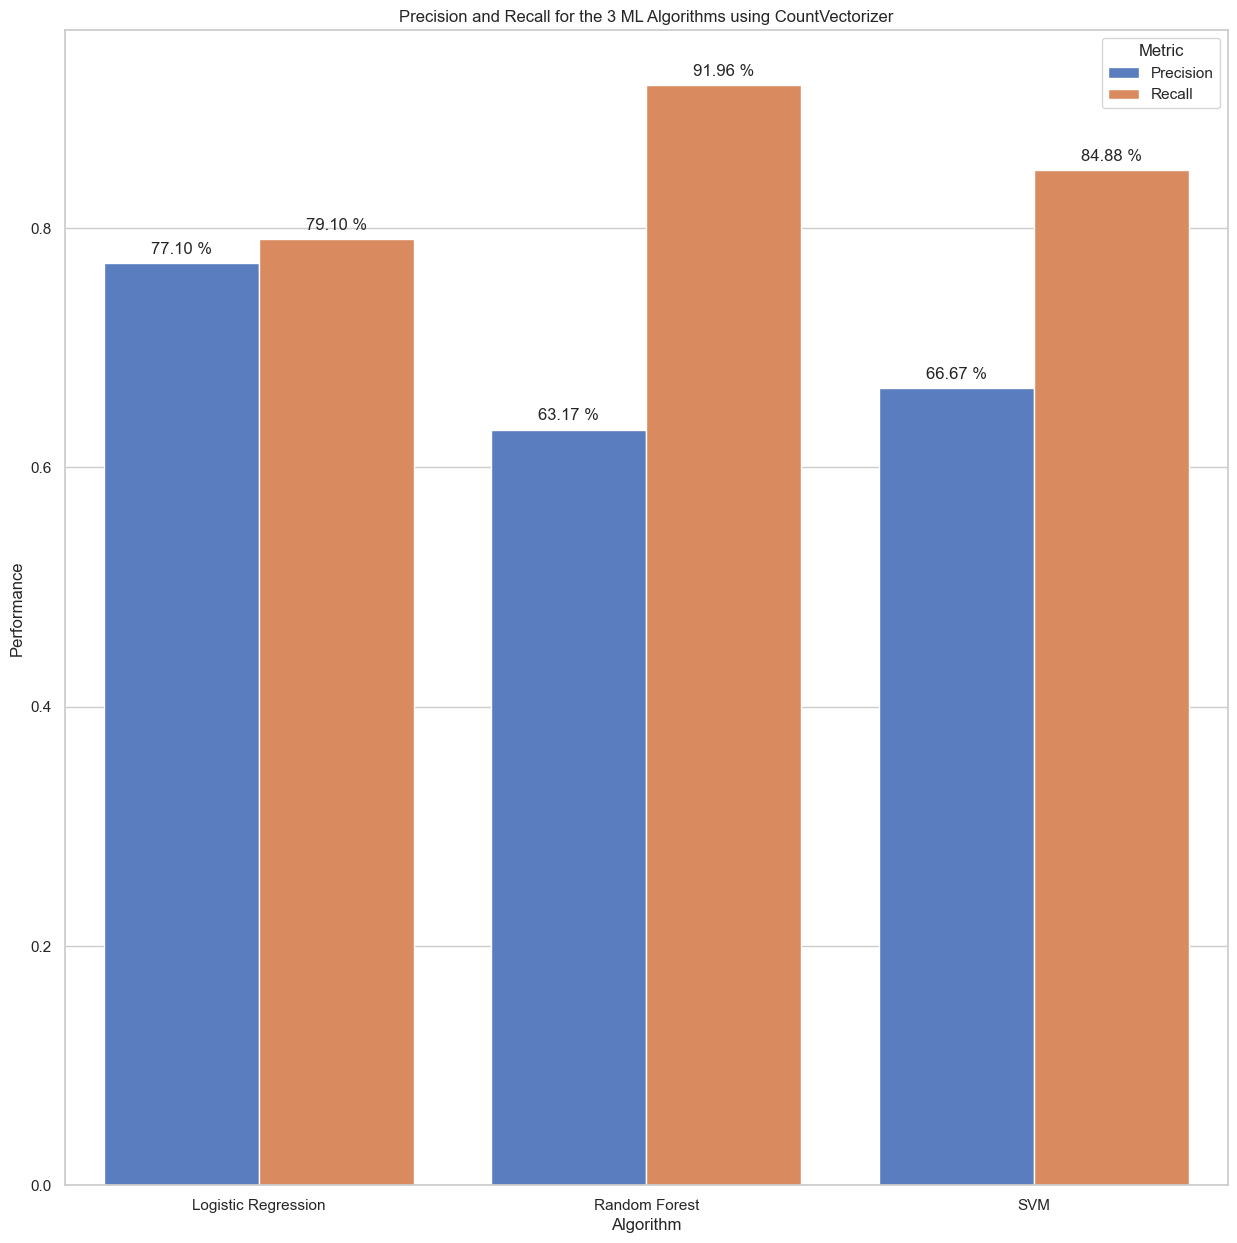

In [131]:
# Visualise the performance of the 3 algorithms for countvectorizer

# define the names of the 3 algorithms used
algorithm_names = ['Logistic Regression', 'Random Forest', 'SVM']

# define the precision values obtained from the 3 algorithms.
precision_values = [p1, p2, p3]  

# define the recall values obtained from the 3 algorithms.
recall_values = [r1, r2, r3]

# Create a DataFrame for easy plotting
data = pd.DataFrame({
    'Algorithm': algorithm_names * 2,
    'Metric': ['Precision'] * 3 + ['Recall'] * 3,
    'Value': precision_values + recall_values
})

# Plotting using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(15, 15))

# Use the 'hue' parameter to distinguish between precision and recall
ax = sns.barplot(x='Algorithm', y='Value', hue='Metric', data=data, palette='muted')

# Add labels and title
plt.xlabel('Algorithm')
plt.ylabel('Performance')
plt.title('Precision and Recall for the 3 ML Algorithms using CountVectorizer')

# Show legend
plt.legend(title='Metric')

# Add values on top of each bar
# for p in ax.patches:
#     ax.annotate(f'{p.get_height() * 100:.2f} %', (p.get_x() + p.get_width() / 2., p.get_height()),
#                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# For label annotations
for p in ax.patches:
    value = p.get_height()
    if value != 0.0:
        ax.annotate(f'{value * 100:.2f} %', (p.get_x() + p.get_width() / 2., value),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Show the plot
plt.show()


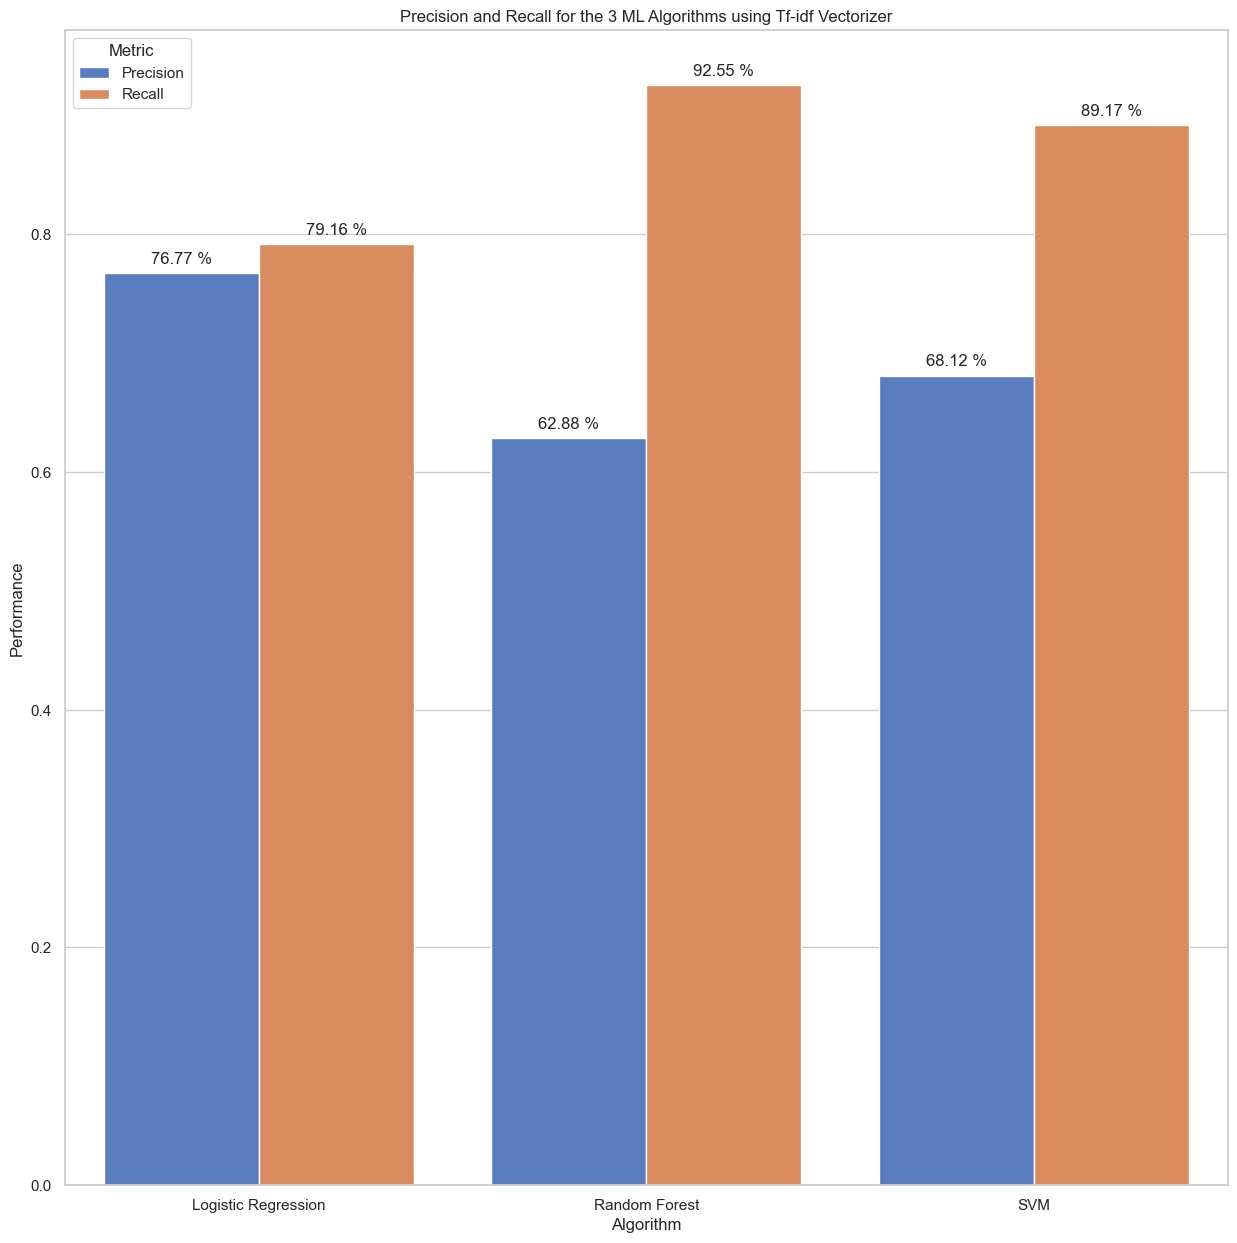

In [132]:
# Visualise the performance of the 3 algorithms for Tf-idf vectorizer

# define the names of the 3 algorithms used
algorithm_names = ['Logistic Regression', 'Random Forest', 'SVM']

# define the precision values obtained from the 3 algorithms.
precision_values = [p1_vect, p2_vect, p3_vect]

# define the recall values obtained from the 3 algorithms.
recall_values = [r1_vect, r2_vect, r3_vect]  

# Create a DataFrame for easy plotting
data = pd.DataFrame({
    'Algorithm': algorithm_names * 2,
    'Metric': ['Precision'] * 3 + ['Recall'] * 3,
    'Value': precision_values + recall_values
})

# Plotting using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(15, 15))

# Use the 'hue' parameter to distinguish between precision and recall
ax = sns.barplot(x='Algorithm', y='Value', hue='Metric', data=data, palette='muted')

# Add labels and title
plt.xlabel('Algorithm')
plt.ylabel('Performance')
plt.title('Precision and Recall for the 3 ML Algorithms using Tf-idf Vectorizer')

# Show legend
# plt.legend(title='Metric')
plt.legend(title='Metric', loc='upper left')

# for label annotation 
for p in ax.patches:
    value = p.get_height()
    if value != 0.0:
        ax.annotate(f'{value * 100:.2f} %', (p.get_x() + p.get_width() / 2., value),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Show the plot
plt.show()


## ....................................................Thank You .........................................................